<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exponential Smoothing

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
levels = 2 + 0.05 * np.random.randn(120, )

In [ ]:
trends = np.linspace(0, 10, 120) + 0.1 * np.random.randn(120)

In [ ]:
seasonalities = np.sin(np.linspace(0, 119, 120) * (2 *np.pi / 12)) + 0.1 * np.random.randn(120,)

[]

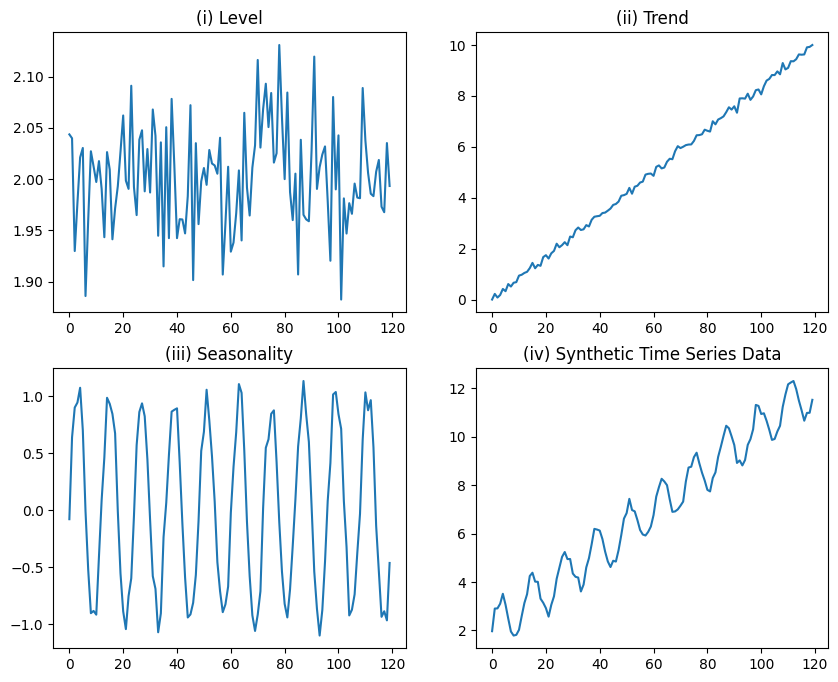

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax[0, 0].plot(level)
ax[0, 0].set_title('(i) Level')
ax[0, 1].plot(trend)
ax[0, 1].set_title('(ii) Trend')
ax[1, 0].plot(seasonality)
ax[1, 0].set_title('(iii) Seasonality')
ax[1, 1].plot(levels + trends + seasonalities)
ax[1, 1].set_title('(iv) Synthetic Time Series Data')
plt.plot()

In [ ]:
def SES(inputs, alpha = 0.2):
    predicts = [inputs[0], inputs[0]]
    for i in range(1, len(inputs) - 1):
        level = alpha * inputs[i] + (1 - alpha) * predicts[-1]
        predicts.append(level)

    return np.array(predicts)

In [ ]:
def train_step(alpha, lr_rate):
    epsilon = 1e-4
    loss_eps = np.mean((SES(level, alpha + epsilon) - level)**2)
    loss = np.mean((SES(level, alpha) - level)**2)
    delta = (loss_eps - loss)/ epsilon
    alpha -= lr_rate * delta
    return loss, delta, alpha

In [ ]:
alpha = 0.1
tol_level = 1e-12
loss_old = float('inf')
for i in range(2000):
    loss, delta, alpha = train_step(alpha, lr_rate = 0.2)
    if abs(loss - loss_old) < tol_level:
        print(i, loss, delta, alpha)
        break
    print(loss, delta, alpha)
    loss_old = loss

0.002248388785300142 0.00040219546385607957 0.09991956090722878
0.0022483566125460395 0.000400206245881711 0.09983951965805243
0.0022483247581764564 0.00039822203180394505 0.09975987525169164
0.002248293219811574 0.00039624285422257266 0.09968062668084712
0.002248261995078348 0.0003942687458718258 0.09960177293167276
0.0022482310816105983 0.0003922997387920471 0.09952331298391434
0.0022482004770491984 0.00039033586466796083 0.09944524581098074
0.0022481701790421377 0.0003883771549501036 0.09936757037999072
0.00224814018524473 0.00038642364019562947 0.0992902856519516
0.002248110493319683 0.00038447535126526905 0.09921339058169854
0.002248081100937235 0.00038253231810034954 0.09913688411807847
0.0022480520057752956 0.00038059457054245155 0.09906076520396997
0.002248023205519564 0.0003786621377045718 0.09898503277642906
0.0022479946978636173 0.0003767350486953702 0.09890968576668999
0.0022479664805090675 0.00037481333182119714 0.09883472310032575
0.002247938551165646 0.000372897015427434

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
ses = SimpleExpSmoothing(level)
result = ses.fit(smoothing_level = None, optimized = True)

In [ ]:
result.summary()

Dep. Variable:,endog,No. Observations:,120
Model:,SimpleExpSmoothing,SSE,0.269
Optimized:,True,AIC,-727.855
Trend:,None,BIC,-722.280
Seasonal:,None,AICC,-727.507
Seasonal Periods:,None,Date:,"Fri, 31 Jan 2025"
Box-Cox:,False,Time:,14:39:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0869527,alpha,True
initial_level,1.9513122,l.0,False


In [ ]:
result.params['smoothing_level']

0.2

In [ ]:
from scipy.optimize import minimize

def objective_function(alpha):
    return np.mean((SES(level, alpha[0]) - level)**2)
result = minimize(objective_function, [0.1], method='CG')
print(result.x)

[0.08695294]


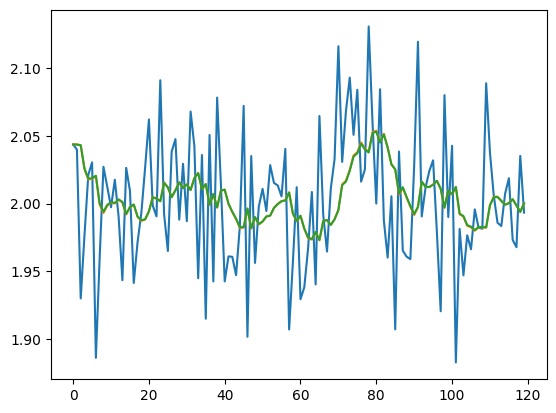

In [ ]:
plt.plot(level)
plt.plot(SES(level, alpha = 0.0563487931439663))
plt.plot(result.fittedvalues)
plt.show();

In [ ]:
result.fittedvalues

array([2.02086709, 2.02086709, 2.02128407, 2.01752973, 2.01863459,
       2.01762791, 2.01828753, 2.0195012 , 2.01680001, 2.01330243,
       2.01627449, 2.01867916, 2.01981517, 2.02114051, 2.02131946,
       2.02439306, 2.02538285, 2.02795874, 2.02598726, 2.02424646,
       2.028157  , 2.02776926, 2.02743025, 2.03090326, 2.03307606,
       2.03253162, 2.0309228 , 2.03123796, 2.0302232 , 2.02614553,
       2.0272264 , 2.0269478 , 2.02892121, 2.02518303, 2.02444889,
       2.02092077, 2.02021681, 2.01993409, 2.01733647, 2.01583767,
       2.01612104, 2.01678455, 2.01636572, 2.01516823, 2.01448793,
       2.01547426, 2.01459091, 2.01402544, 2.01151712, 2.01466792,
       2.01532739, 2.01496072, 2.01257025, 2.00986369, 2.00944359,
       2.01195512, 2.01069288, 2.00928306, 2.00747211, 2.00448034,
       2.00334499, 2.00216321, 2.00185262, 2.00071708, 2.00262521,
       2.00478984, 2.00742967, 2.00839198, 2.00743009, 2.00759617,
       2.00965648, 2.00779789, 2.00646273, 2.00623617, 2.00517

# Simulation of MA(1)

In [185]:
class MA_1():
    def __init__(self, mu, theta, T = 100, err_mu = 0, err_var = 1):
        self.mu = mu
        self.theta = theta
        self.T = T
        self.err_mu = err_mu
        self.err_var = err_var
        self.series, self.mean, self.var = self.call()

    def call(self):
        ma_1 = np.zeros(self.T)
        eps = np.sqrt(self.err_var) * np.random.randn(self.T + 1) + self.err_mu
        for i in range(self.T):
            ma_1[i] = self.mu + self.theta * eps[i - 1] + eps[i]
        return ma_1, ma_1.mean(), ma_1.var()

    def autocorr(self, order = 1):
        auto_corr = 0
        for i in range(self.T - order):
            auto_corr += (self.series[i] - self.mean) * (self.series[i + order] - self.mean)

        auto_corr /= ((self.T - order) * self.var)

        return auto_corr

    def plot_autocorr(self):
        auto_corrs = [1.0]
        for i in range(1, self.T//2):
            auto_corrs.append(self.autocorr(order = i))

        plt.bar(np.arange(self.T//2), auto_corrs)

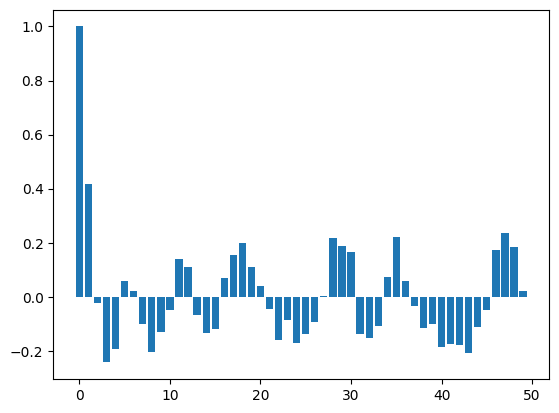

In [188]:
MA_1(0, 0.5).plot_autocorr()

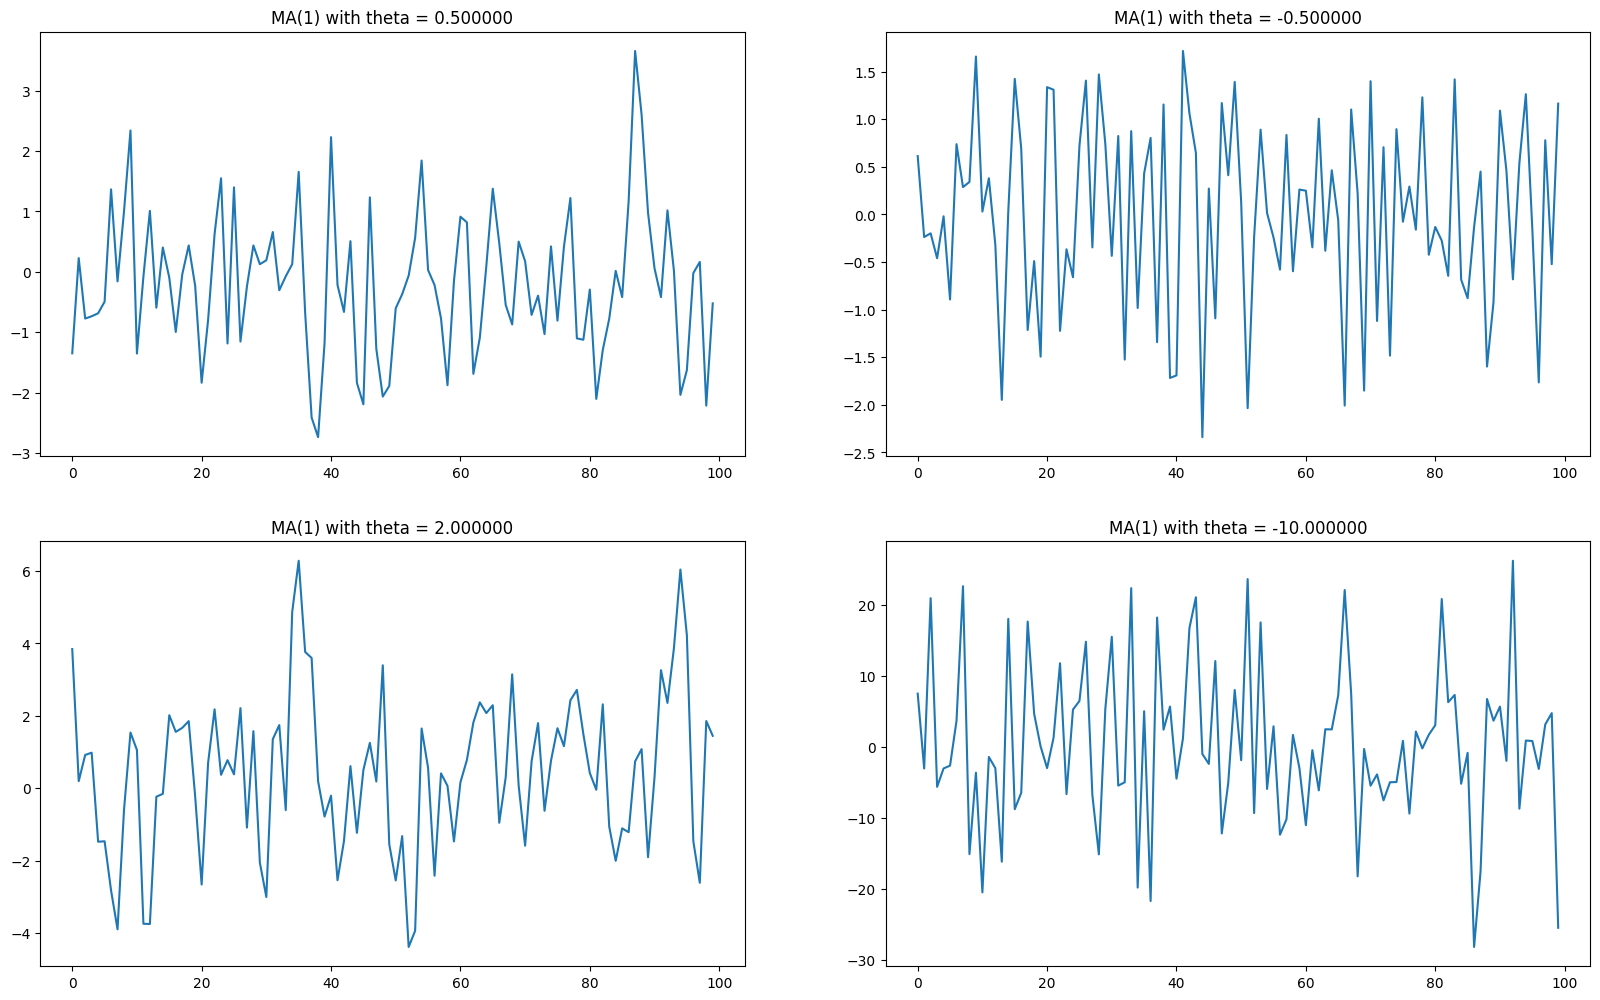

In [105]:
plt.figure(figsize = (20,32))
thetas = [0.5, -0.5, 2.0, -10]
for i, theta in enumerate(thetas):
  plt.subplot(5, 2, i+1)
  plt.title("MA(1) with theta = %f" %theta)
  plt.plot(MA_1(0, theta).series)

In [230]:
class Realization_MA1():
    def __init__(self, mus, thetas, paths = 30, T = 100, err_mu = 0, err_var = 1):
        self.mus = mus
        self.thetas = thetas
        self.paths = paths
        self.T = T
        self.err_mu = err_mu
        self.err_var = err_var
        self.pd_mas_list = self.call()


    def call(self):
        pd_mas_list = []
        for mu, theta in zip(self.mus, self.thetas):
            pd_mas = pd.DataFrame(MA_1(mu, theta).series)
            for i in range(1, self.paths):
                pd_mas[i] = MA_1(mu, theta).series

            pd_mas = pd_mas.transpose()
            pd_mas_list.append(pd_mas)
        return pd_mas_list

    def ensemble_auto_corr(self, order = 1):
        auto_corrs = []
        for i in range(len(self.thetas)):
            corr = self.pd_mas_list[i].cov()/ self.pd_mas_list[i].var()
            auto_corr = []
            for j in range(self.T - order):
                auto_corr.append(corr.iloc[j, j + order])
            auto_corrs.append(auto_corr)

        return auto_corrs

    def plot_ensemble_mean(self, figsize = (14, 7)):
        #print(f'Ensemble Means of MA(1) Process {self.T} Realizations with {self.T} Time Steps')
        plt.figure(figsize = figsize)
        plt.suptitle(f'Ensemble Means of Each Time Step of MA(1) Processes over {self.T} Realizations with {self.T} Time Steps')

        for i, theta in enumerate(self.thetas):
            plt.subplot(2, len(self.thetas)//2, i+1)
            plt.title(f"theta: {theta:.2f}\nTheoretical Mean: {self.mus[i]:.2f}, Avg of Ensemble Means: {self.pd_mas_list[i].mean().mean():.2f}")
            plt.plot(self.pd_mas_list[i].mean())
            plt.tight_layout()

    def plot_ensemble_var(self, figsize = (14, 7)):
        #print(f'MA(1) Process {self.T} Realizations with {self.T} Time Steps')
        plt.figure(figsize = figsize)
        plt.suptitle(f'Ensemble Variances of Each Time Step of MA(1) Processes over {self.T} Realizations with {self.T} Time Steps')

        for i, theta in enumerate(self.thetas):
            plt.subplot(2, len(self.thetas)//2, i+1)
            plt.title(f"theta: {theta:.2f}\nTheoretical Var: {(1 + theta**2)*self.err_var:.2f}, Avg of Ensemble Var: {self.pd_mas_list[i].var().mean():.2f}")
            plt.plot(self.pd_mas_list[i].mean())
            plt.tight_layout()

    def plot_ensemble_auto_corr(self, figsize = (14, 7)):
        auto_corrs_matrix = np.zeros((len(self.thetas), self.T//2))
        auto_corrs_matrix[:,0] = 1.0
        for i in range(1, self.T//2):
            auto_corrs = np.array(self.ensemble_auto_corr(order = i)).mean(axis = 1)
            auto_corrs_matrix[:, i] = auto_corrs

        plt.figure(figsize = figsize)
        plt.suptitle(f'Ensemble Autocorrelations of MA(1) Processes over {self.T} Realizations with {self.T} Time Steps')

        for i, theta in enumerate(self.thetas):
            plt.subplot(2, len(self.thetas)//2, i+1)
            plt.title(f"theta: {theta:.2f}\nTheoretical p_1: {theta/(1 + theta**2):.2f}, Avg of Ensemble p_1: {auto_corrs_matrix[i, 1]:.2f}")
            plt.bar(np.arange(self.T//2), auto_corrs_matrix[i, :])
            plt.tight_layout()


In [231]:
realization = Realization_MA1([0, 0, 0, 0], [0.5, -0.5, 2.0, -10.0])

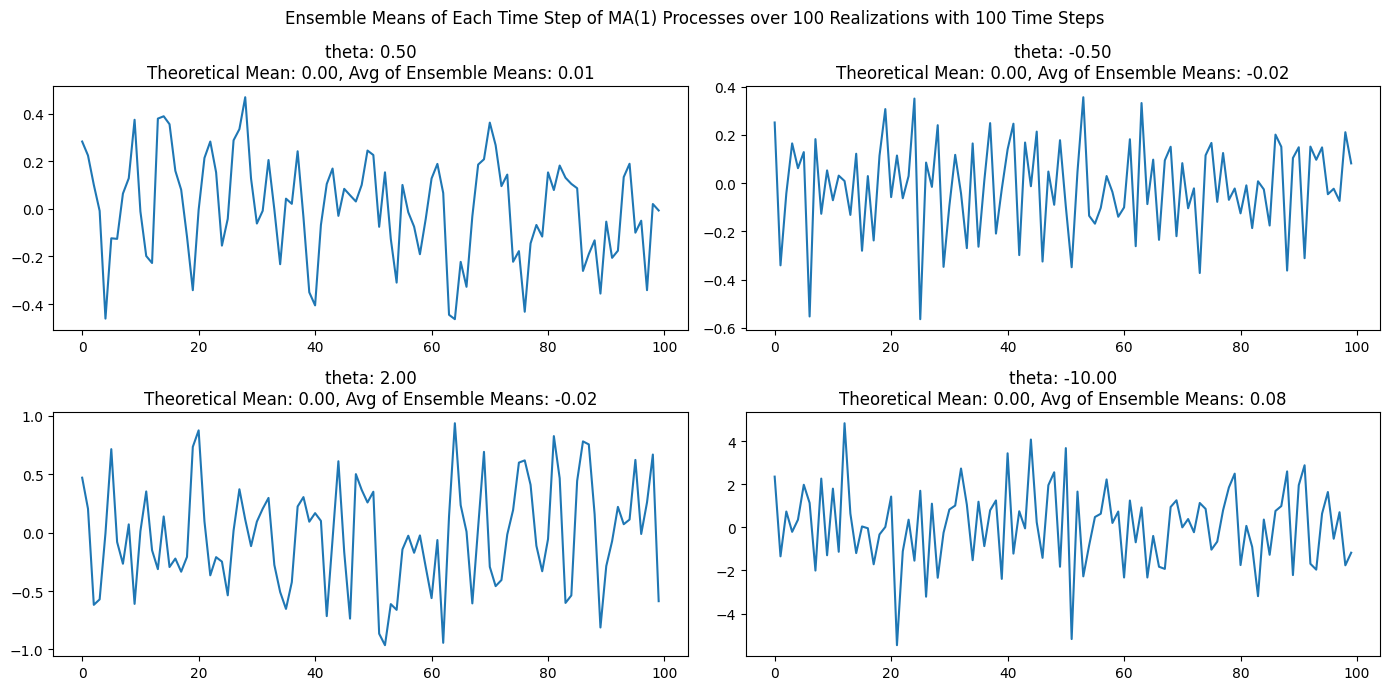

In [232]:
realization.plot_ensemble_mean()

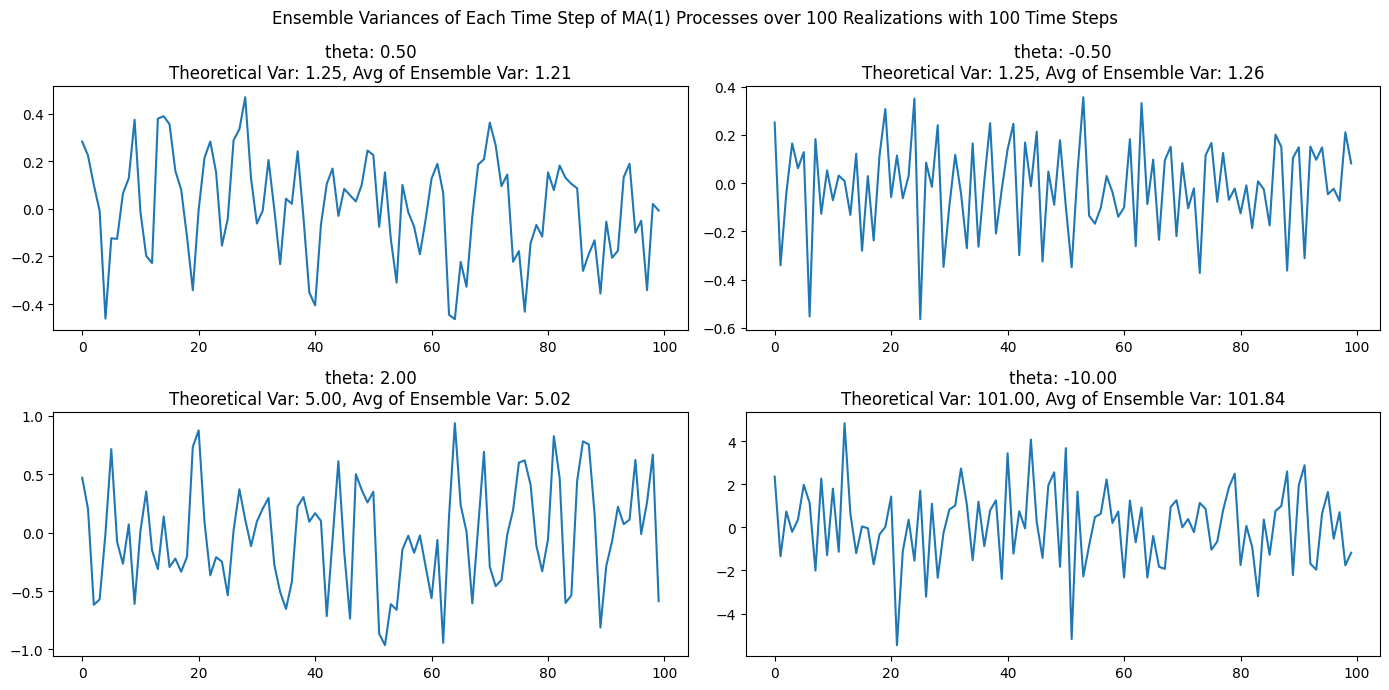

In [233]:
realization.plot_ensemble_var()

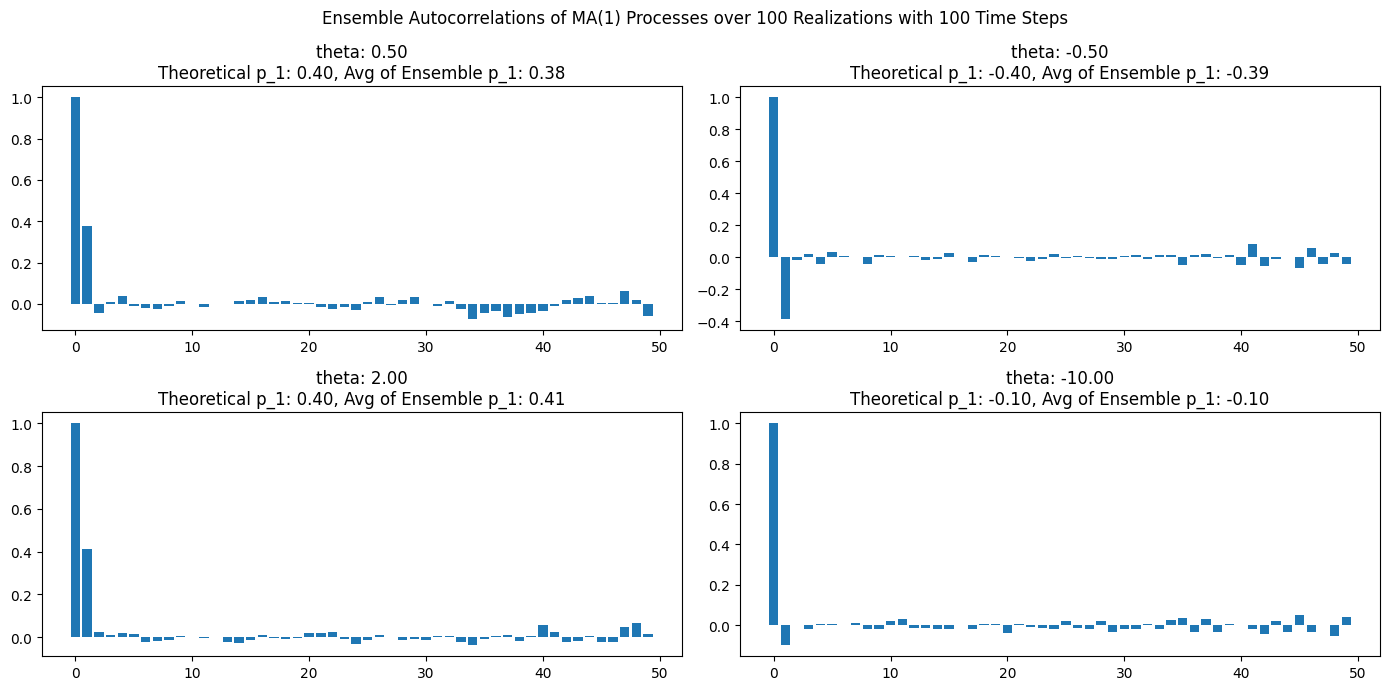

In [234]:
realization.plot_ensemble_auto_corr()

# Simulation of AR(1)

In [12]:
class AR_1():
    def __init__(self, c, phi, T = 100, err_mu = 0, err_var = 1):
        self.c = c
        self.phi = phi
        self.T = T
        self.err_mu = err_mu
        self.err_var = err_var
        self.series, self.mean, self.var = self.call()

    def call(self):
        ar_1 = np.zeros(self.T)
        eps = np.sqrt(self.err_var) * np.random.randn(self.T) + self.err_mu
        for i in range(1, self.T):
            ar_1[i] = self.c + self.phi * ar_1[i - 1] + eps[i]
        return ar_1, ar_1.mean(), ar_1.var()

    def autocorr(self, order = 1):
        auto_corr = 0
        for i in range(self.T - order):
            auto_corr += (self.series[i] - self.mean) * (self.series[i + order] - self.mean)

        auto_corr /= ((self.T - order) * self.var)

        return auto_corr

    def plot_autocorr(self):
        auto_corrs = [1.0]
        for i in range(1, self.T//2):
            auto_corrs.append(self.autocorr(order = i))

        plt.bar(np.arange(self.T//2), auto_corrs)

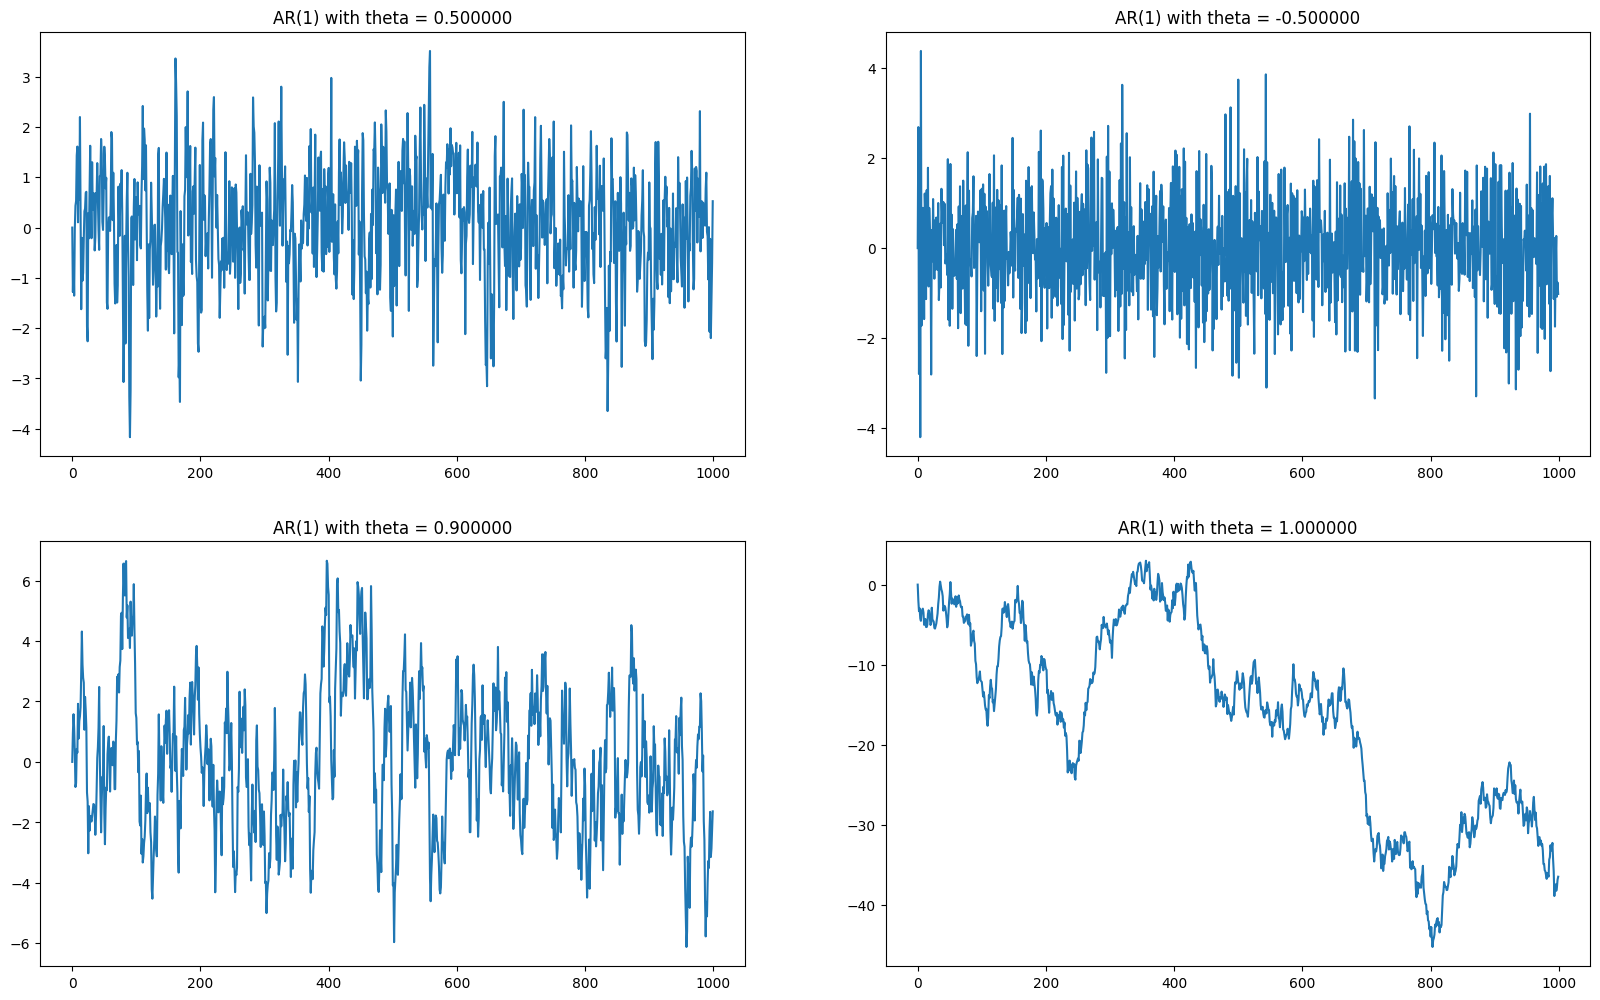

In [16]:
plt.figure(figsize = (20,32))
thetas = [0.5, -0.5, 0.9, 1.0]
for i, theta in enumerate(thetas):
  plt.subplot(5, 2, i+1)
  plt.title("AR(1) with theta = %f" %theta)
  plt.plot(AR_1(0, theta, 1000).series)